# Import and set colors

In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from gprofiler import gprofiler

import os 

In [2]:
plt.rcParams['figure.figsize']=(4,4) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=False, fontsize=12, color_map='plasma')
sc.logging.print_header()

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.22.3 scipy==1.8.0 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.4


In [3]:
#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [4]:
pair= [ "#DA0AD3", "#ED99BD",  "#FD3F14", "#ffbf00", 
       "#66B032", "#66B032", "#9AD255", "#9AD255",
       "#b30047",   "#dada2b", "#dada2b"]

# Set project file paths

In [5]:
file_path = '/Volumes/Seagate_Exp/Paper_sc_analysis/notebooks/analysis_early_time_points/040522_corrected_notebooks/Revision/'
#this is my file path please adapt it to your directory

In [6]:
data_dir =file_path +  'data/' 

In [7]:
table_dir = file_path + 'tables/230809diffxpy/'

In [8]:
sc.settings.figdir = file_path + 'figures/'

In [9]:
import datetime

today = datetime.date.today().strftime('%y%m%d') #creates a YYMMDD string of today's date

# Read Data & downstream analysis

In [10]:
adata_all_oligos=sc.read(data_dir + "230808adata_treated_oligos_proc_scVI.h5ad")

In [11]:
adata_all_oligos

AnnData object with n_obs × n_vars = 4708 × 14250
    obs: 'sample_id', 'condition', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'doublet_score', 'doublet', 'size_factors', 'leiden', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'leiden13', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_all', 'S_score', 'G2M_score', 'phase', 'Cycling cells', 'cell_cycle', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DCs', 'NKT cells', 'T cells', 'B cells', 'Neutrophils', 'Neurons', 'OPCs', 'COPs', 'MOL', 'Astrocytes', 'Pericytes', 'VSMCs', 'VLMCs', 'VEC', 'annotated', 'annotated_group', 'leiden_oligos_r1', 'leiden_oligos_r0.5', 'leiden_oligos_r0.8', 'NFOL', 'MFOL', 'clustersoligos'
    var: 'gene_ids

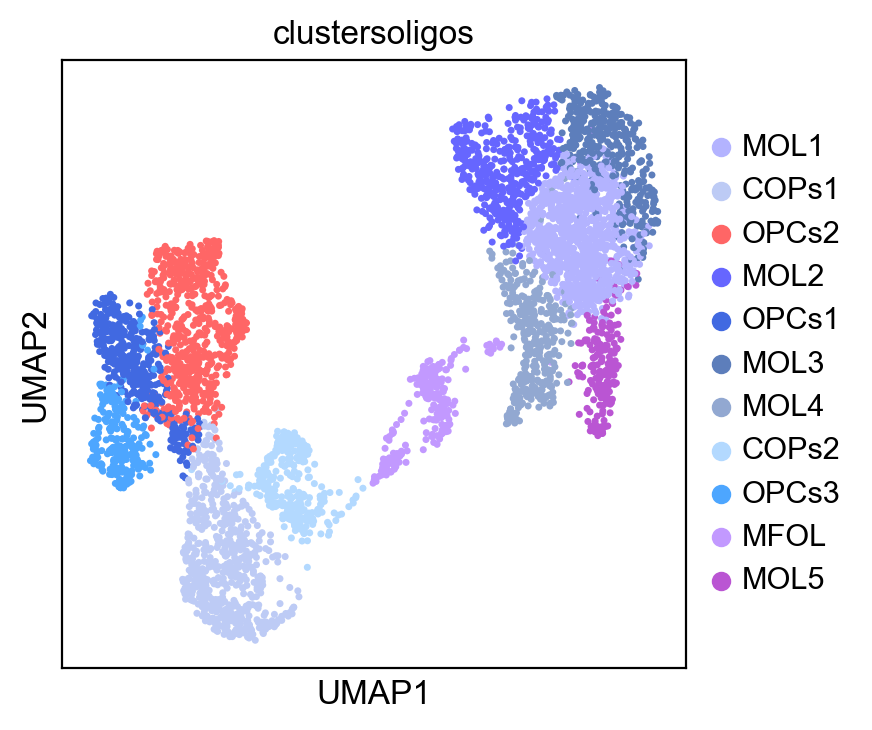

In [12]:
sc.pl.umap(adata_all_oligos, color='clustersoligos')

In [13]:
adata_all_oligos_5dpi= adata_all_oligos[np.in1d(adata_all_oligos.obs['condition'], 
                           ['5dpi_CTRL','5dpi_INH'])].copy()

In [14]:
import batchglm.api as glm
import diffxpy.api as de

print("batchglm version "+glm.__version__)
print("diffpy version "+de.__version__)
from batchglm.pkg_constants import TF_CONFIG_PROTO

batchglm version v0.7.4
diffpy version v0.7.4


In [15]:
#Set number of threads
TF_CONFIG_PROTO.inter_op_parallelism_threads = 1
TF_CONFIG_PROTO.intra_op_parallelism_threads = 12

# 5dpi

In [16]:
adata_all_oligos_5dpi.obs['clustersoligos'].value_counts()*0.1

MOL1     68.3
COPs1    46.6
MOL3     35.3
MOL4     30.6
MOL2     29.3
OPCs2    24.1
COPs2    22.0
MFOL     17.5
MOL5     12.8
OPCs3    11.0
OPCs1     9.7
Name: clustersoligos, dtype: float64

In [17]:
adata_all_oligos_5dpi_OPCs2= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['OPCs2'])].copy()

In [18]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_OPCs2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_OPCs2, min_cells=24)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_OPCs2.n_vars))

Total number of genes: 14250
filtered out 4766 genes that are detected in less than 24 cells
Number of genes after cell filter: 9484


In [19]:
adata_all_oligos_5dpi_OPCs3= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['OPCs3'])].copy()

In [20]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_OPCs3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_OPCs3, min_cells=11)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_OPCs3.n_vars))

Total number of genes: 14250
filtered out 8493 genes that are detected in less than 11 cells
Number of genes after cell filter: 5757


In [21]:
adata_all_oligos_5dpi_COPs1= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['COPs1'])].copy()

In [22]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_COPs1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_COPs1, min_cells=47)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_COPs1.n_vars))

Total number of genes: 14250
filtered out 5836 genes that are detected in less than 47 cells
Number of genes after cell filter: 8414


In [23]:
adata_all_oligos_5dpi_COPs2= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['COPs2'])].copy()

In [24]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_COPs2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_COPs2, min_cells=22)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_COPs2.n_vars))

Total number of genes: 14250
filtered out 9429 genes that are detected in less than 22 cells
Number of genes after cell filter: 4821


In [25]:
adata_all_oligos_5dpi_MOL1= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['MOL1'])].copy()

In [26]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_MOL1.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_MOL1, min_cells=68)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_MOL1.n_vars))

Total number of genes: 14250
filtered out 7693 genes that are detected in less than 68 cells
Number of genes after cell filter: 6557


In [27]:
adata_all_oligos_5dpi_MOL2= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['MOL2'])].copy()

In [28]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_MOL2.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_MOL2, min_cells=29)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_MOL2.n_vars))

Total number of genes: 14250
filtered out 6720 genes that are detected in less than 29 cells
Number of genes after cell filter: 7530


In [29]:
adata_all_oligos_5dpi_MOL3= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['MOL3'])].copy()

In [30]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_MOL3.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_MOL3, min_cells=35)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_MOL3.n_vars))

Total number of genes: 14250
filtered out 6548 genes that are detected in less than 35 cells
Number of genes after cell filter: 7702


In [31]:
adata_all_oligos_5dpi_MOL4= adata_all_oligos_5dpi[np.in1d(adata_all_oligos_5dpi.obs['clustersoligos'], 
                           ['MOL4'])].copy()

In [32]:
#Filter genes:
print('Total number of genes: {:d}'.format(adata_all_oligos_5dpi_MOL4.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_all_oligos_5dpi_MOL4, min_cells=31)
print('Number of genes after cell filter: {:d}'.format(adata_all_oligos_5dpi_MOL4.n_vars))

Total number of genes: 14250
filtered out 7209 genes that are detected in less than 31 cells
Number of genes after cell filter: 7041


# Cluster OPCs2

In [33]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs2= de.test.wald(
    data=adata_all_oligos_5dpi_OPCs2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_OPCs2.var_names,
    sample_description=adata_all_oligos_5dpi_OPCs2.obs
)

training location model: False
training scale model: True
iter   0: ll=11399306.753774
iter   1: ll=11399306.753774, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=2418641.882212, converged: 0.16% (loc: 0.16%, scale update: True), in 12.85sec
iter   3: ll=2418641.882212, converged: 0.16% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=2380713.430354, converged: 95.38% (loc: 95.38%, scale update: True), in 12.68sec
iter   5: ll=2380713.430354, converged: 95.38% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=2375023.825968, converged: 99.00% (loc: 99.00%, scale update: True), in 5.66sec
iter   7: ll=2375023.825968, converged: 99.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=2374140.280953, converged: 99.82% (loc: 99.82%, scale update: True), in 5.35sec
iter   9: ll=2374140.280953, converged: 99.82% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=2374001.620976, converged: 99.96% (loc: 99.96%, scale 

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

In [34]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs2.summary().sort_values('qval', ascending=True).iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
5240,Calr,0.0,0.0,-0.812521,10.506224,False,9.471519e-08,-0.812521,0.094552,-771.708013
6640,Pfn1,0.0,0.0,-1.089710,9.265560,False,1.036559e-09,-1.089710,0.120330,-755.987830
5959,Cryab,0.0,0.0,-1.561042,5.804979,False,1.384675e-09,-1.561042,0.184779,-626.047863
4489,Cd81,0.0,0.0,-0.736372,36.539419,False,9.622235e-10,-0.736372,0.075501,-1035.188660
6705,Rpl23a,0.0,0.0,-0.945843,16.419087,False,3.648689e-08,-0.945843,0.106439,-885.839008
5644,Dhrs1,0.0,0.0,-1.835039,13.381743,False,1.991495e-08,-1.835039,0.209282,-758.987319
8517,Rps2,0.0,0.0,-0.909934,21.331950,False,5.686755e-08,-0.909934,0.108598,-951.321252
9187,Cfl1,0.0,0.0,-0.899019,21.298755,False,2.268061e-08,-0.899019,0.097263,-939.222695
4265,Hbb-bs,0.0,0.0,2.316732,8.489627,False,4.585608e-08,2.316732,0.258349,-537.674951
1148,Dynlrb1,0.0,0.0,-1.133988,7.290456,False,1.636428e-08,-1.133988,0.126748,-702.218333


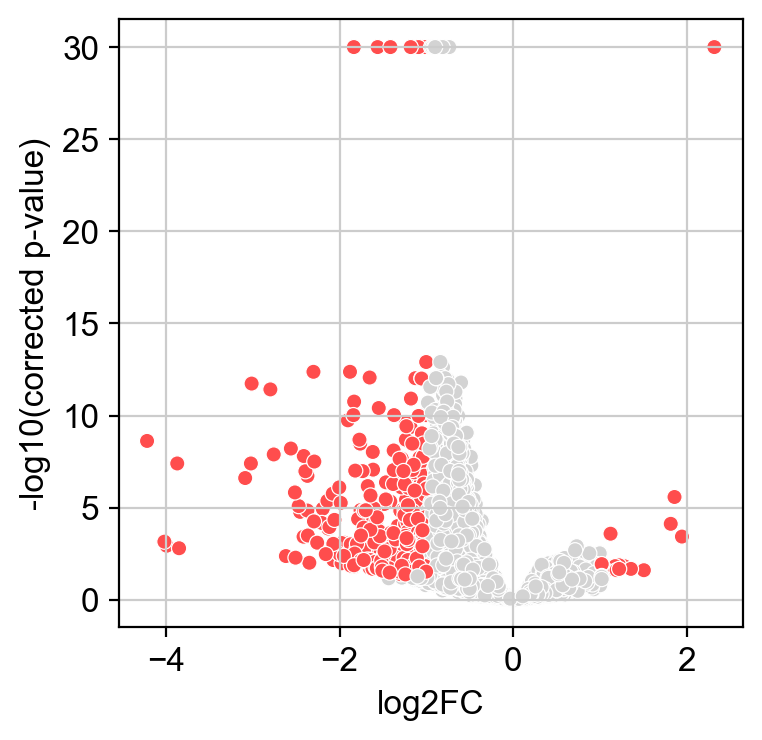

In [35]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [36]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs2.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs2.csv')

In [37]:
difxpy_5dpi_INHvsCTRL_OPCs2 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs2.csv', index_col=0)

In [38]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_OPCs2=difxpy_5dpi_INHvsCTRL_OPCs2.loc[difxpy_5dpi_INHvsCTRL_OPCs2['mean']>0.2]

In [39]:
difxpy_5dpi_INHvsCTRL_expressed_OPCs2

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.000021,0.000220,-0.681119,1.070539,False,4.024948e-09,-0.681119,0.159962,-332.058306
1,Lypla1,0.013052,0.046273,-0.596642,0.423237,False,7.795906e-11,-0.596642,0.240353,-205.194922
2,Tcea1,0.201505,0.364012,-0.182622,1.315353,False,1.552947e-08,-0.182622,0.142978,-373.777413
3,Rgs20,0.024161,0.074786,-0.535702,0.531120,False,4.265954e-09,-0.535702,0.237608,-235.422902
4,Atp6v1h,0.061181,0.151935,-0.318173,0.892116,False,2.240493e-09,-0.318173,0.169947,-311.011443
...,...,...,...,...,...,...,...,...,...,...
9479,mt-Nd6,0.024117,0.074672,1.019669,0.311203,False,1.263951e-08,1.019669,0.452128,-143.323029
9480,mt-Cytb,0.037794,0.105520,-0.191019,54.746888,False,1.745572e-08,-0.191019,0.091965,-1177.461198
9481,Vamp7,0.073458,0.175045,-0.291402,0.817427,False,5.440889e-09,-0.291402,0.162797,-293.338735
9482,PISD,0.000288,0.002045,0.713083,0.912863,False,8.164319e-10,0.713083,0.196677,-311.645125


In [40]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs2 = difxpy_5dpi_INHvsCTRL_expressed_OPCs2.loc[difxpy_5dpi_INHvsCTRL_expressed_OPCs2['pval']<0.05]

In [41]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_OPCs2 = difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs2['log2fc']>0.7]
oligos_5dpi_CTRL_OPCs2 = difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs2['log2fc']<-0.7]

In [42]:
oligos_5dpi_INH_OPCs2.shape

(37, 10)

In [43]:
oligos_5dpi_CTRL_OPCs2.shape

(1031, 10)

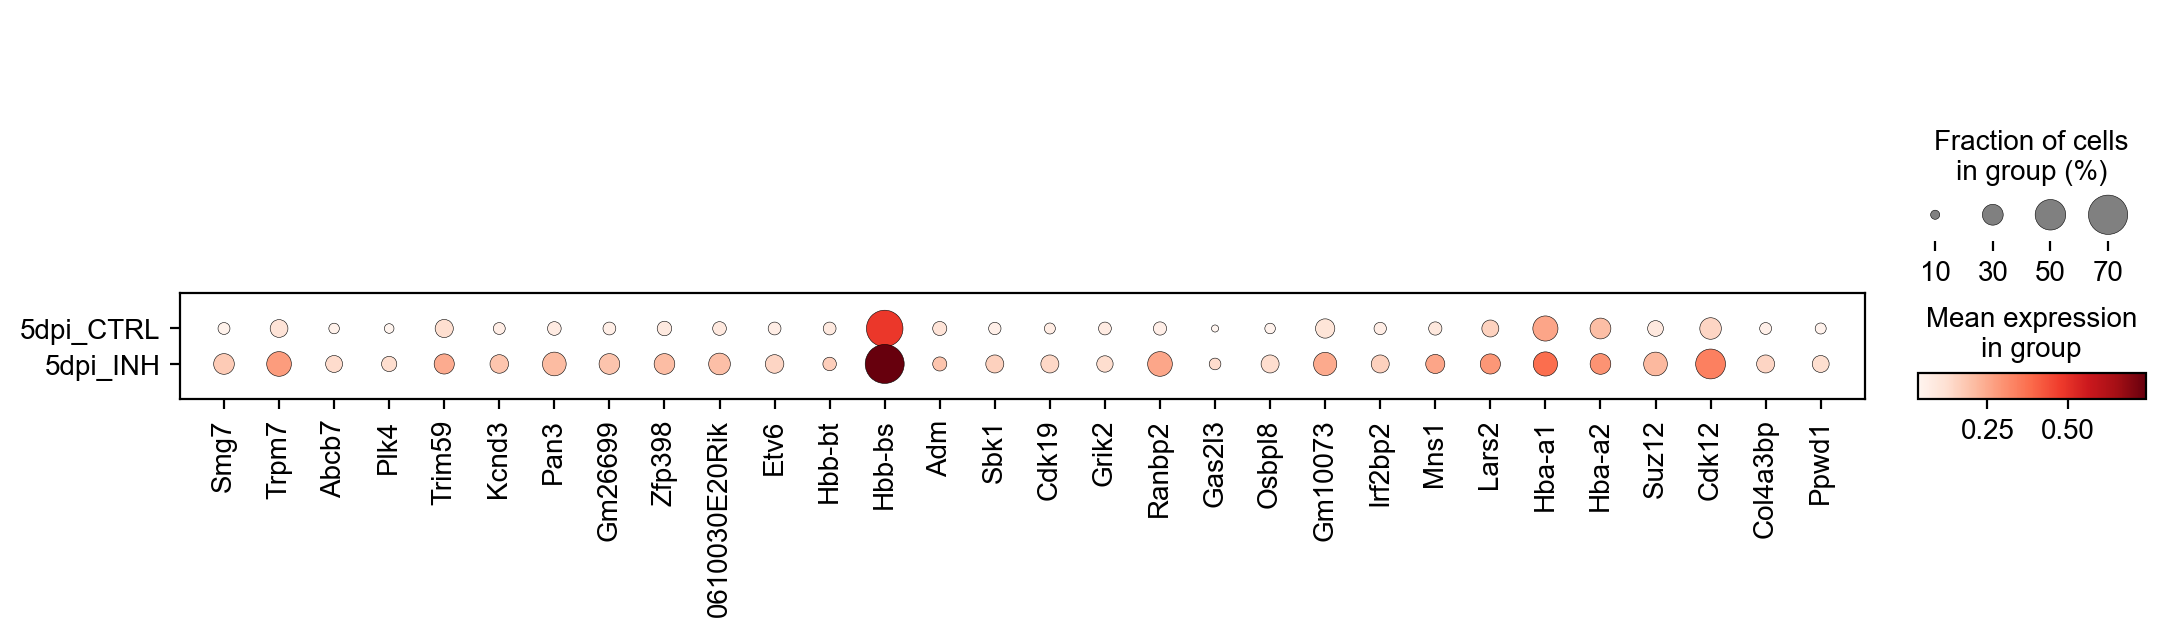

In [44]:
sc.pl.dotplot(adata_all_oligos_5dpi_OPCs2,oligos_5dpi_INH_OPCs2['gene'].head(30) , groupby='condition',)

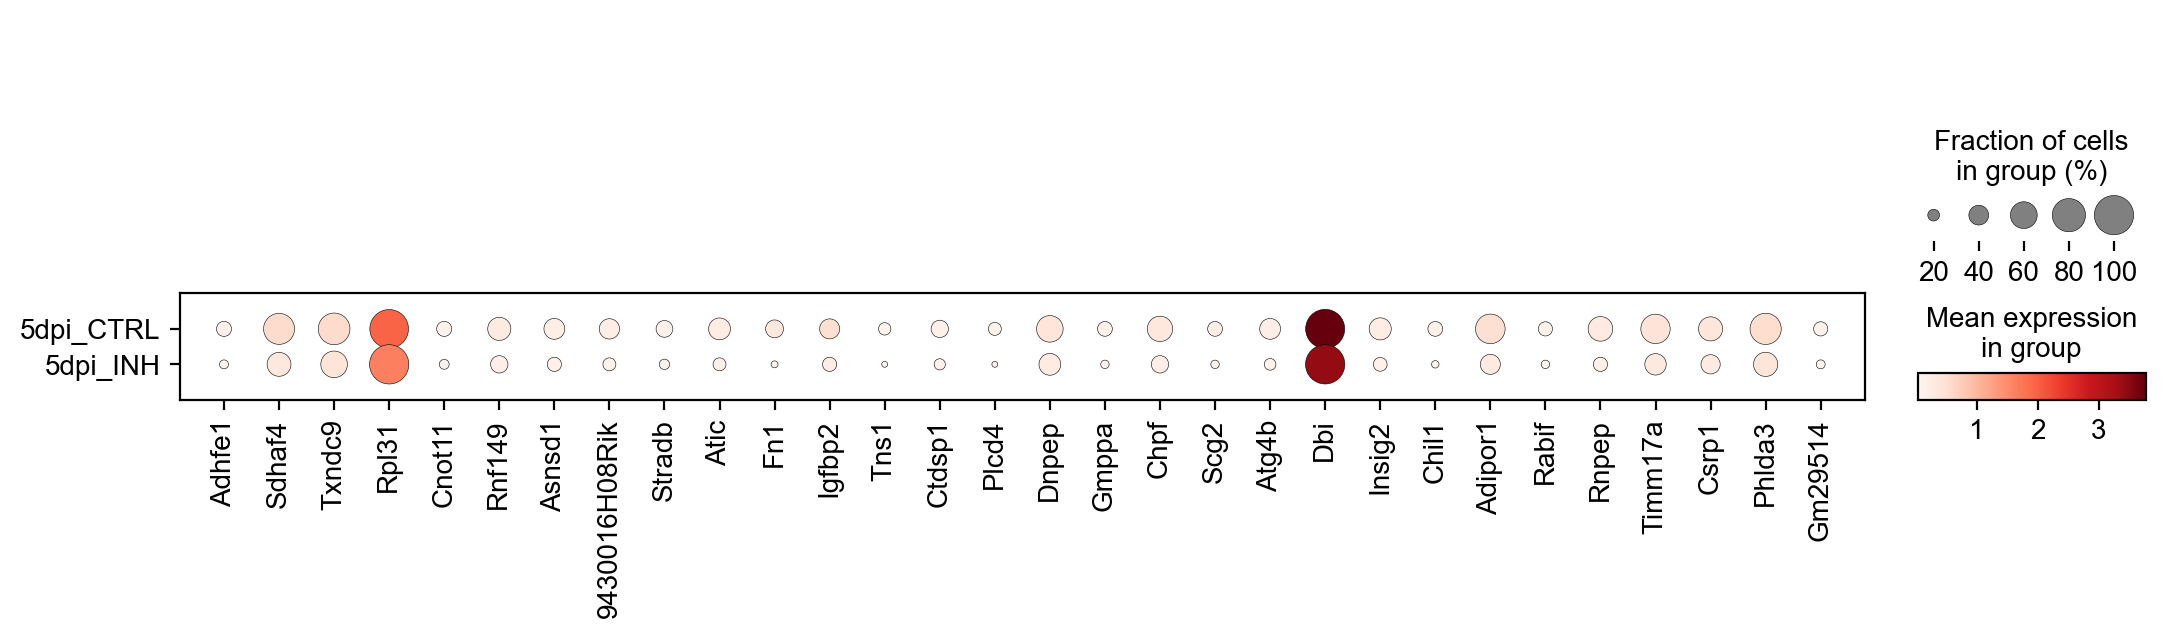

In [45]:
sc.pl.dotplot(adata_all_oligos_5dpi_OPCs2,oligos_5dpi_CTRL_OPCs2['gene'].head(30) , groupby='condition',)

# Cluster OPCs3

In [46]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs3= de.test.wald(
    data=adata_all_oligos_5dpi_OPCs3.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_OPCs3.var_names,
    sample_description=adata_all_oligos_5dpi_OPCs3.obs
)

training location model: False
training scale model: True
iter   0: ll=7577816.768164
iter   1: ll=7577816.768164, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=430426.450655, converged: 0.16% (loc: 0.16%, scale update: True), in 9.78sec
iter   3: ll=430426.450655, converged: 0.16% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=399471.773522, converged: 87.44% (loc: 87.44%, scale update: True), in 9.36sec
iter   5: ll=399471.773522, converged: 87.44% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=395912.461266, converged: 96.96% (loc: 96.96%, scale update: True), in 5.56sec
iter   7: ll=395912.461266, converged: 96.96% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=395442.439399, converged: 99.55% (loc: 99.55%, scale update: True), in 5.04sec
iter   9: ll=395442.439399, converged: 99.55% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=395252.572432, converged: 99.91% (loc: 99.91%, scale update: True)

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

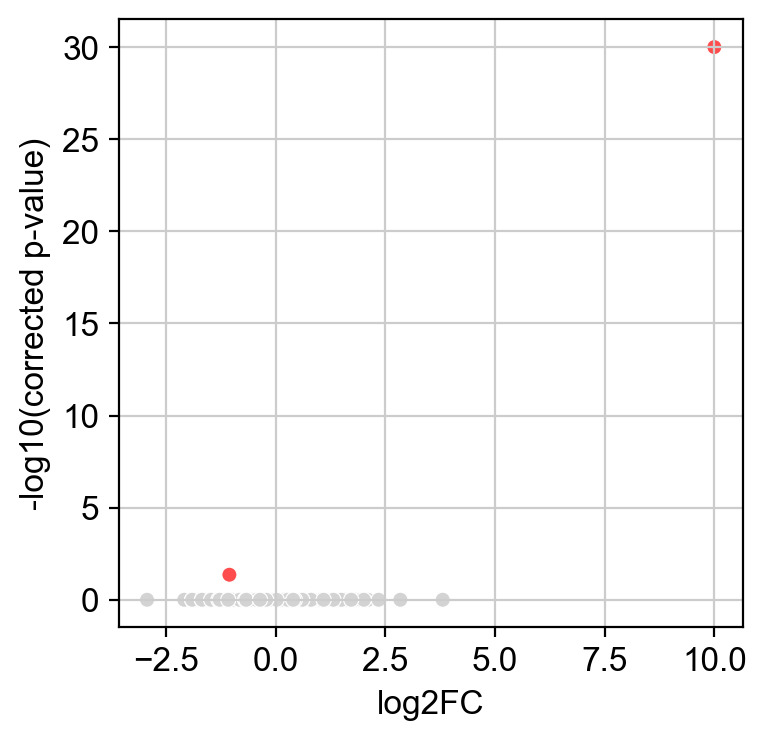

In [47]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs3.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [48]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs3.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs3.csv')

In [49]:
difxpy_5dpi_INHvsCTRL_OPCs3 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_OPCs3.csv', index_col=0)

In [50]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_OPCs3=difxpy_5dpi_INHvsCTRL_OPCs3.loc[difxpy_5dpi_INHvsCTRL_OPCs3['mean']>0.2]

In [51]:
difxpy_5dpi_INHvsCTRL_expressed_OPCs3

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
3,Tcea1,0.922519,0.993897,0.035517,0.390909,False,1.480477e-09,0.035517,0.365171,-90.867420
4,Atp6v1h,0.302516,0.993246,0.400160,0.300000,False,2.064213e-09,0.400160,0.388108,-76.383746
5,Rb1cc1,0.148873,0.993246,0.472481,0.572727,False,3.614685e-09,0.472481,0.327311,-112.399085
6,Pcmtd1,0.811176,0.993246,-0.092316,0.363636,False,3.546519e-10,-0.092316,0.386409,-86.871310
7,Sntg1,0.267707,0.993246,-0.398348,0.518182,False,1.123211e-10,-0.398348,0.359403,-105.962370
...,...,...,...,...,...,...,...,...,...,...
5752,mt-Nd4,0.047218,0.993246,-0.259053,18.754545,False,1.619587e-08,-0.259053,0.130549,-418.037695
5753,mt-Nd5,0.917127,0.993897,0.022530,2.672727,False,7.882090e-09,0.022530,0.216522,-236.370369
5754,mt-Nd6,0.412882,0.993246,0.400160,0.327273,False,1.829467e-08,0.400160,0.488696,-78.875959
5755,mt-Cytb,0.078671,0.993246,-0.216511,37.581818,False,5.453464e-08,-0.216511,0.123126,-489.543926


In [52]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs3 = difxpy_5dpi_INHvsCTRL_expressed_OPCs3.loc[difxpy_5dpi_INHvsCTRL_expressed_OPCs3['pval']<0.05]

In [53]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_OPCs3 = difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs3.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs3['log2fc']>0.7]
oligos_5dpi_CTRL_OPCs3 = difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs3.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_OPCs3['log2fc']<-0.7]

In [54]:
oligos_5dpi_INH_OPCs3.shape

(42, 10)

In [55]:
oligos_5dpi_CTRL_OPCs3.shape

(46, 10)

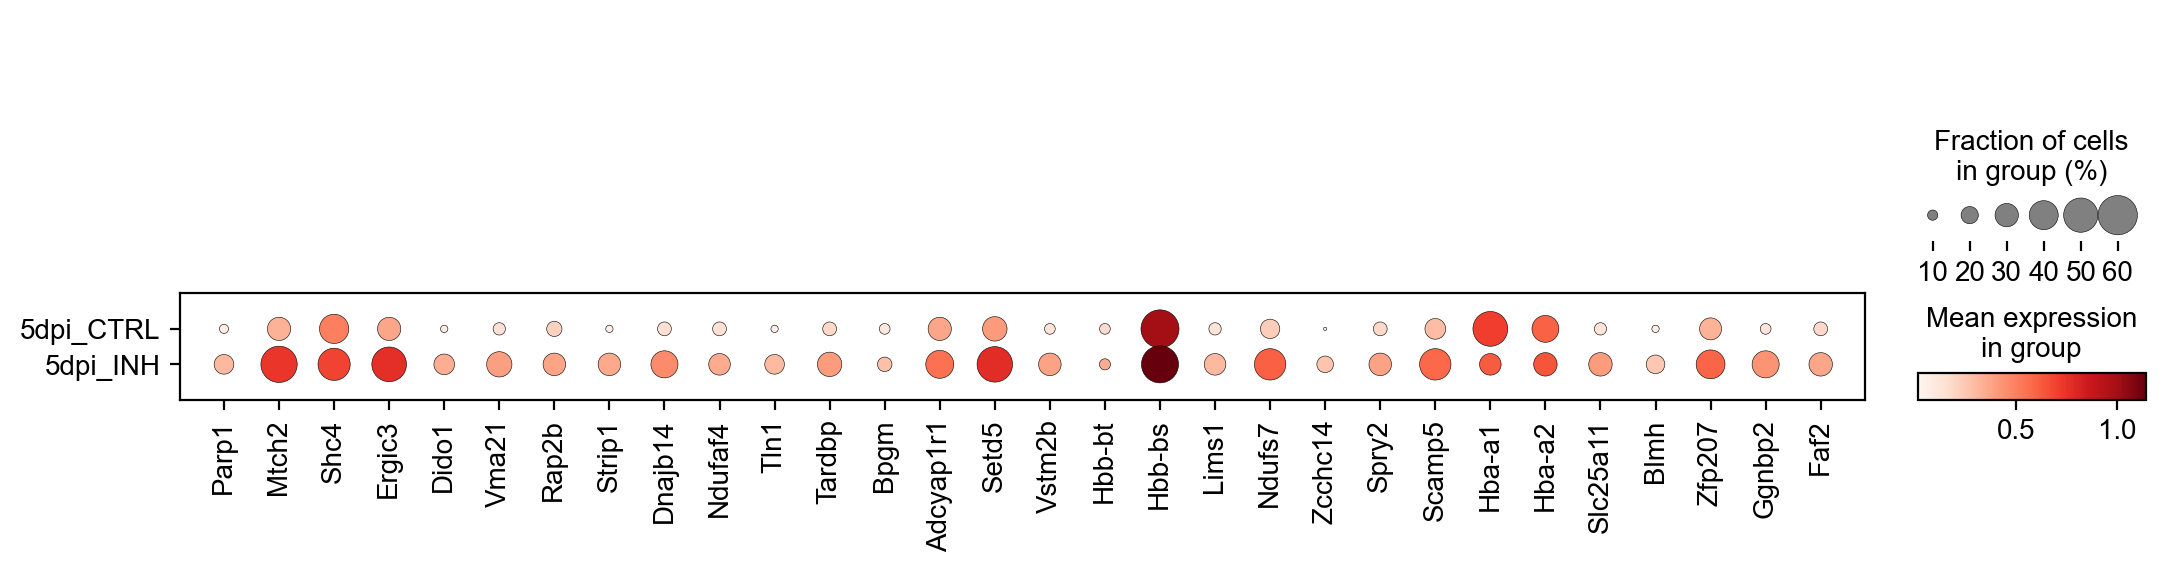

In [56]:
sc.pl.dotplot(adata_all_oligos_5dpi_OPCs3,oligos_5dpi_INH_OPCs3['gene'].head(30) , groupby='condition',)

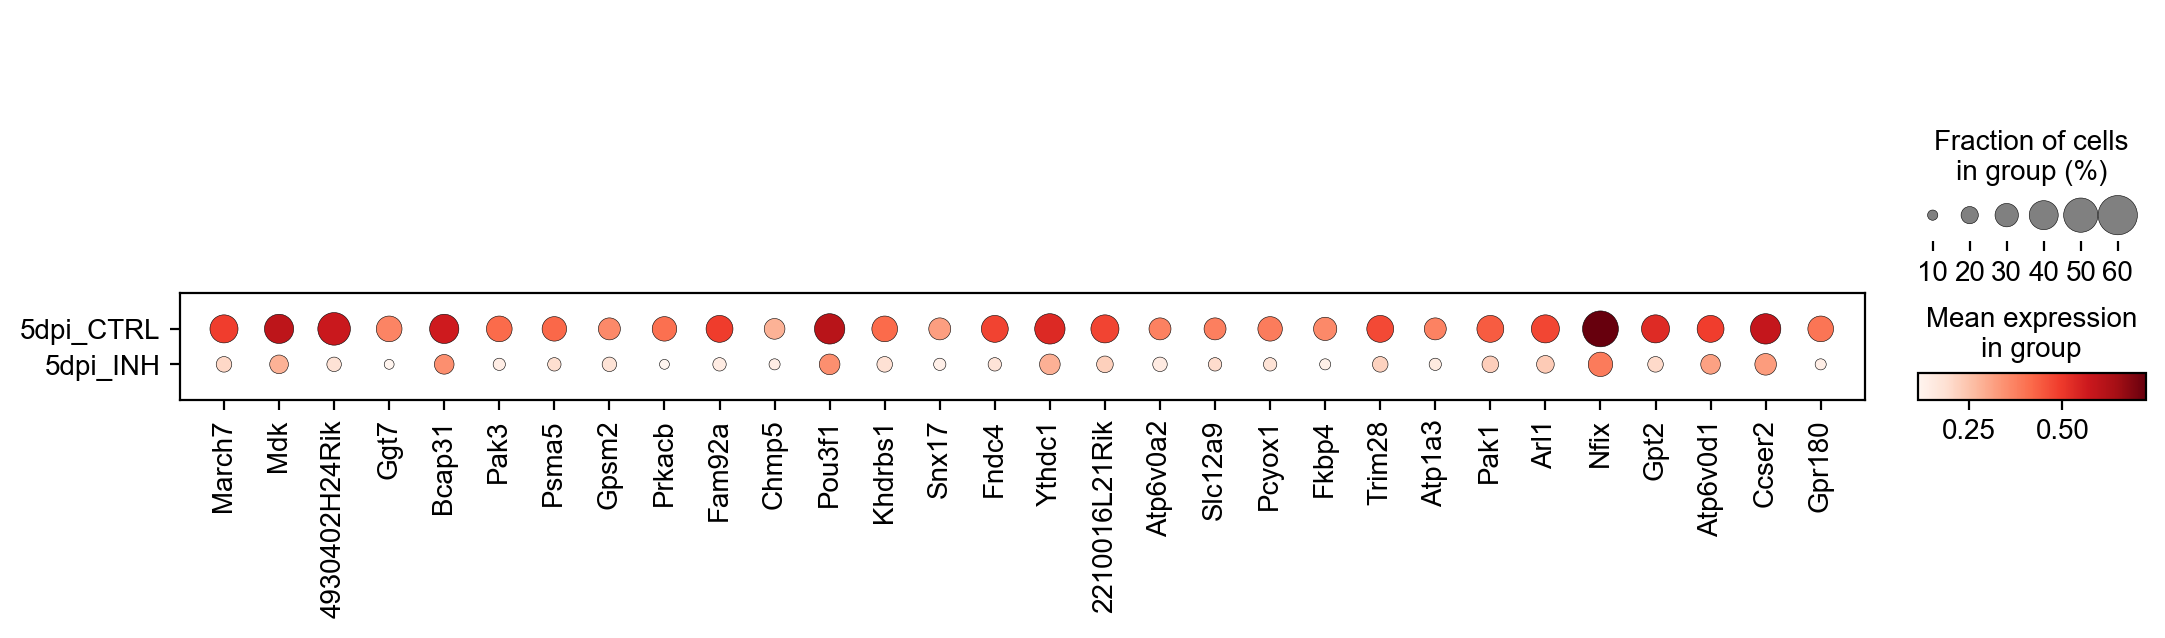

In [57]:
sc.pl.dotplot(adata_all_oligos_5dpi_OPCs3,oligos_5dpi_CTRL_OPCs3['gene'].head(30) , groupby='condition',)

# Cluster COPs1

In [58]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs1= de.test.wald(
    data=adata_all_oligos_5dpi_COPs1.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_COPs1.var_names,
    sample_description=adata_all_oligos_5dpi_COPs1.obs
)

training location model: False
training scale model: True
iter   0: ll=19132437.145546
iter   1: ll=19132437.145546, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=4353587.625849, converged: 0.26% (loc: 0.26%, scale update: True), in 13.16sec
iter   3: ll=4353587.625849, converged: 0.26% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=4285854.559121, converged: 95.79% (loc: 95.79%, scale update: True), in 12.86sec
iter   5: ll=4285854.559121, converged: 95.79% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=4275487.518982, converged: 98.94% (loc: 98.94%, scale update: True), in 5.77sec
iter   7: ll=4275487.518982, converged: 98.94% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=4271923.964883, converged: 99.71% (loc: 99.71%, scale update: True), in 5.53sec
iter   9: ll=4271923.964883, converged: 99.71% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=4271627.183322, converged: 99.95% (loc: 99.95%, scale 

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

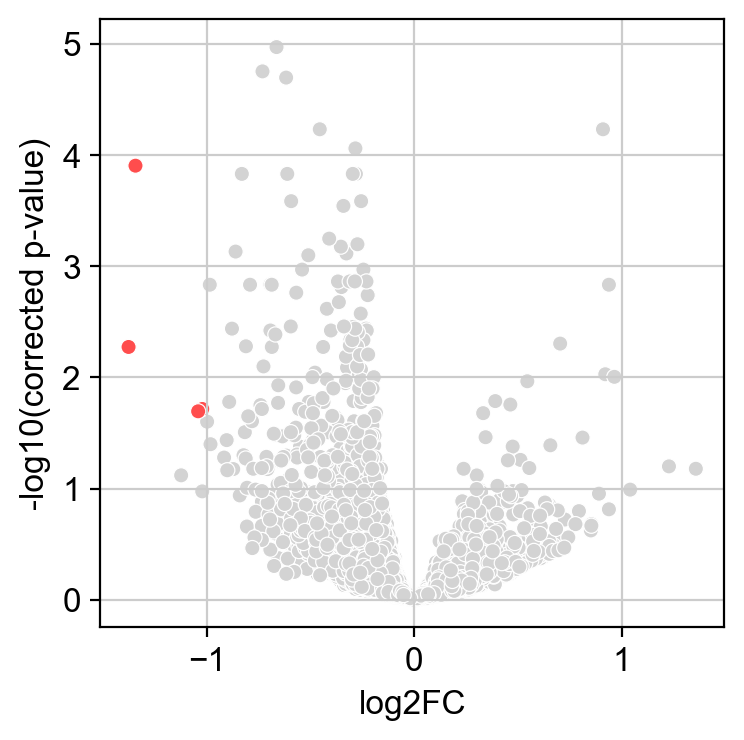

In [59]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs1.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [60]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs1.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs1.csv')

In [61]:
difxpy_5dpi_INHvsCTRL_COPs1 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs1.csv', index_col=0)

In [62]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_COPs1=difxpy_5dpi_INHvsCTRL_COPs1.loc[difxpy_5dpi_INHvsCTRL_COPs1['mean']>0.2]

In [63]:
difxpy_5dpi_INHvsCTRL_expressed_COPs1

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,0.055771,0.363480,-0.190066,0.935622,False,5.130222e-02,-0.190066,0.099364,0.000000
1,Lypla1,0.642646,0.884689,-0.096213,0.236052,False,1.255778e-11,-0.096213,0.207354,-279.398917
2,Tcea1,0.159119,0.560179,-0.151866,1.989270,False,3.041059e-10,-0.151866,0.107857,-882.930076
3,Atp6v1h,0.334109,0.727911,-0.106024,1.246781,False,6.913905e-09,-0.106024,0.109771,-708.812538
4,Rb1cc1,0.667603,0.895345,0.059637,0.965665,False,1.287828e-10,0.059637,0.138872,-634.530325
...,...,...,...,...,...,...,...,...,...,...
8409,mt-Nd6,0.317176,0.716798,0.267176,0.319742,False,1.008378e-08,0.267176,0.267101,-325.214579
8410,mt-Cytb,0.003910,0.099081,-0.164654,52.392704,False,1.913053e-08,-0.164654,0.057065,-2196.456090
8411,Vamp7,0.576473,0.861700,-0.056290,1.135193,False,4.951146e-10,-0.056290,0.100780,-662.182717
8412,PISD,0.698988,0.905710,-0.051725,3.019313,False,9.123450e-09,-0.051725,0.133765,-1040.082392


In [64]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_COPs1 = difxpy_5dpi_INHvsCTRL_expressed_COPs1.loc[difxpy_5dpi_INHvsCTRL_expressed_COPs1['pval']<0.05]

In [65]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_COPs1 = difxpy_5dpi_INHvsCTRL_expressed_signif_COPs1.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_COPs1['log2fc']>0.7]
oligos_5dpi_CTRL_COPs1 = difxpy_5dpi_INHvsCTRL_expressed_signif_COPs1.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_COPs1['log2fc']<-0.7]

In [66]:
oligos_5dpi_INH_COPs1.shape

(7, 10)

In [67]:
oligos_5dpi_CTRL_COPs1.shape

(28, 10)

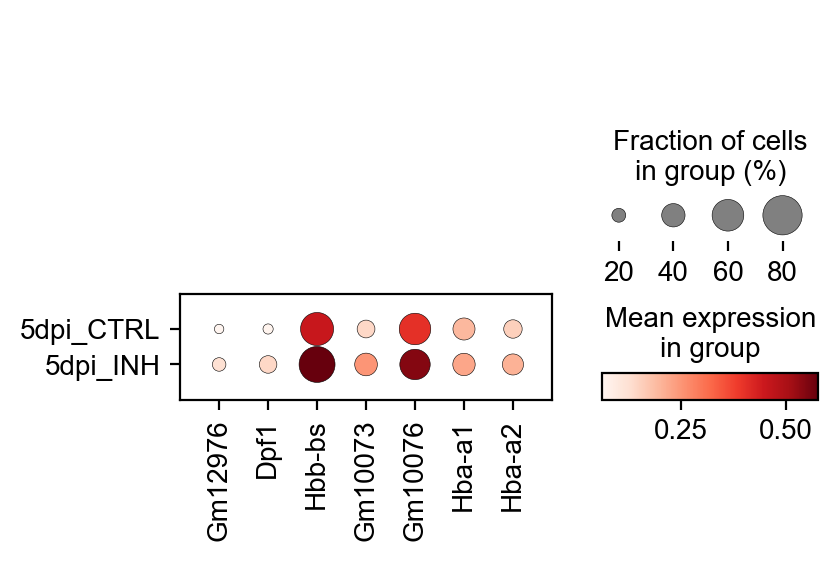

In [68]:
sc.pl.dotplot(adata_all_oligos_5dpi_COPs1,oligos_5dpi_INH_COPs1['gene'].head(30) , groupby='condition',)

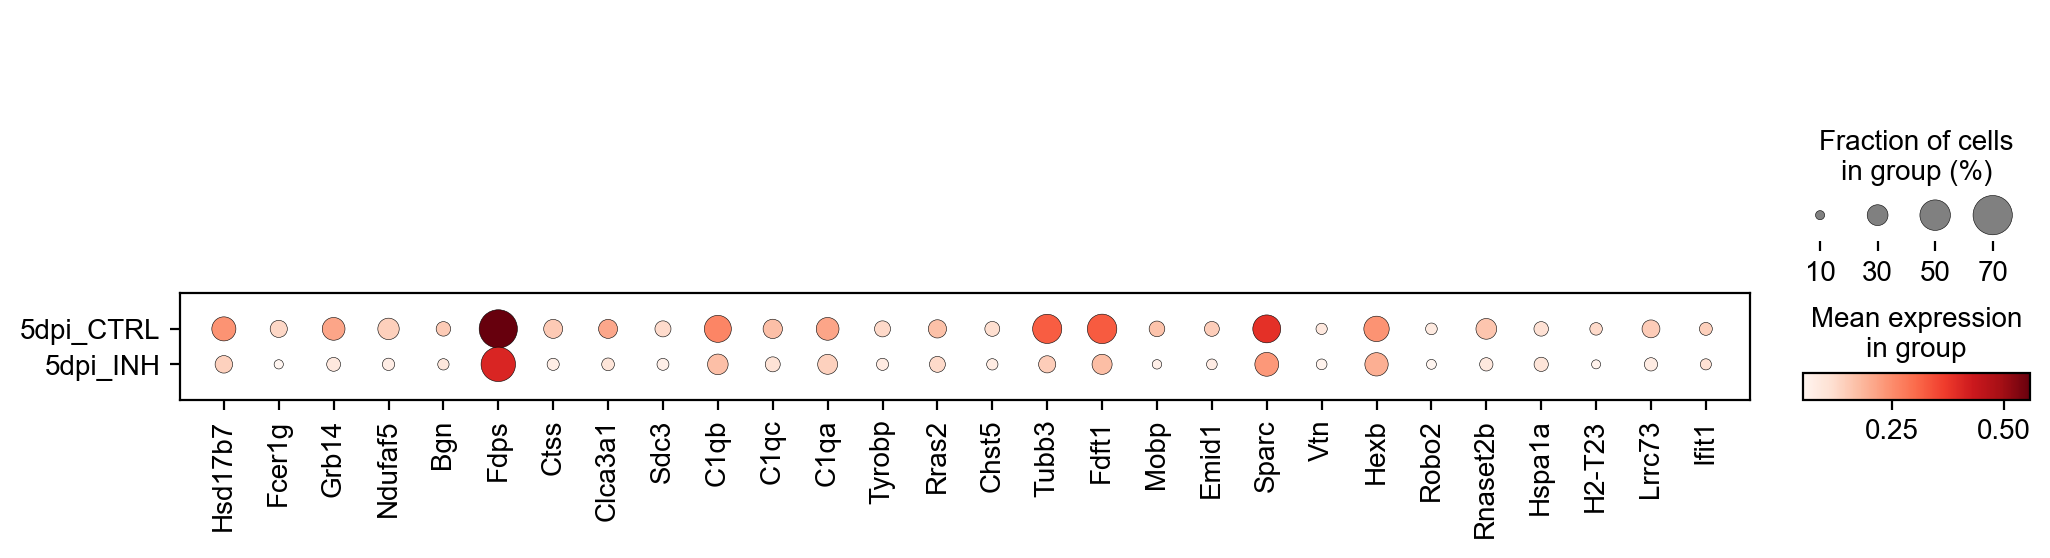

In [69]:
sc.pl.dotplot(adata_all_oligos_5dpi_COPs1,oligos_5dpi_CTRL_COPs1['gene'].head(30) , groupby='condition',)

# Cluster COPs2

In [70]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs2= de.test.wald(
    data=adata_all_oligos_5dpi_COPs2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_COPs2.var_names,
    sample_description=adata_all_oligos_5dpi_COPs2.obs
)

training location model: False
training scale model: True
iter   0: ll=8787829.178912
iter   1: ll=8787829.178912, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=756766.367193, converged: 0.12% (loc: 0.12%, scale update: True), in 9.23sec
iter   3: ll=756766.367193, converged: 0.12% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=724889.015741, converged: 91.06% (loc: 91.06%, scale update: True), in 9.60sec
iter   5: ll=724889.015741, converged: 91.06% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=720790.982055, converged: 98.13% (loc: 98.13%, scale update: True), in 5.49sec
iter   7: ll=720790.982055, converged: 98.13% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=719969.729266, converged: 99.48% (loc: 99.48%, scale update: True), in 5.05sec
iter   9: ll=719969.729266, converged: 99.48% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=719861.525544, converged: 99.88% (loc: 99.88%, scale update: True)

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

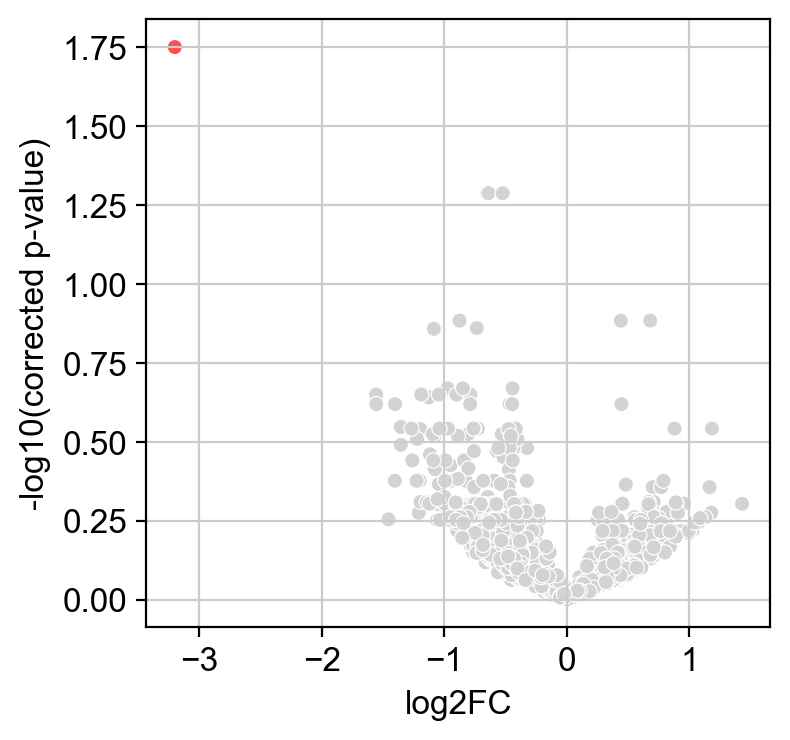

In [71]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [72]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs2.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs2.csv')

In [73]:
today

'230830'

In [74]:
difxpy_5dpi_INHvsCTRL_COPs2 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_COPs2.csv', index_col=0)

In [75]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_COPs2=difxpy_5dpi_INHvsCTRL_COPs2.loc[difxpy_5dpi_INHvsCTRL_COPs2['mean']>0.2]

In [76]:
difxpy_5dpi_INHvsCTRL_expressed_COPs2

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1,Tcea1,0.887989,0.983062,0.041318,0.277273,False,3.792251e-10,0.041318,0.293351,-147.005028
2,Atp6v1h,0.801991,0.968754,0.059920,0.377273,False,2.392329e-09,0.059920,0.238941,-176.754073
3,Rb1cc1,0.729048,0.955690,-0.078252,0.359091,False,9.517515e-05,-0.078252,0.225906,-169.243267
4,St18,0.381848,0.865025,-0.255933,0.290909,False,2.211288e-09,-0.255933,0.292664,-151.048348
5,Pcmtd1,0.290369,0.845364,-0.255933,0.445455,False,2.131498e-09,-0.255933,0.242060,-195.850595
...,...,...,...,...,...,...,...,...,...,...
4816,mt-Nd4,0.267869,0.835415,-0.080338,32.700000,False,9.611077e-08,-0.080338,0.072508,-923.524322
4817,mt-Nd5,0.282223,0.842805,-0.150325,3.877273,False,1.636153e-10,-0.150325,0.139793,-542.417694
4818,mt-Nd6,0.877330,0.983062,-0.055263,0.454545,False,1.103431e-08,-0.055263,0.358025,-183.496826
4819,mt-Cytb,0.750901,0.958846,-0.022284,61.754545,False,8.943642e-08,-0.022284,0.070196,-1056.442041


In [77]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_COPs2 = difxpy_5dpi_INHvsCTRL_expressed_COPs2.loc[difxpy_5dpi_INHvsCTRL_expressed_COPs2['pval']<0.05]

In [78]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_COPs2 = difxpy_5dpi_INHvsCTRL_expressed_signif_COPs2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_COPs2['log2fc']>0.7]
oligos_5dpi_CTRL_COPs2 = difxpy_5dpi_INHvsCTRL_expressed_signif_COPs2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_COPs2['log2fc']<-0.7]

In [79]:
oligos_5dpi_INH_COPs2.shape

(19, 10)

In [80]:
oligos_5dpi_CTRL_COPs2.shape

(51, 10)

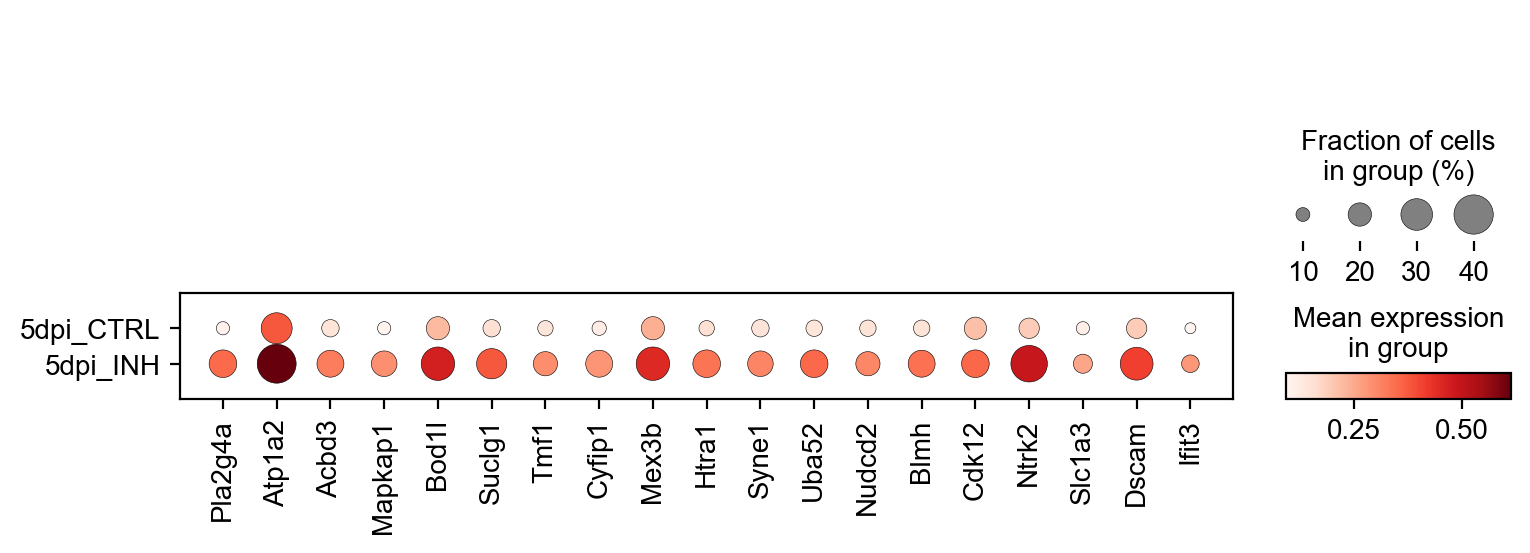

In [81]:
sc.pl.dotplot(adata_all_oligos_5dpi_COPs2,oligos_5dpi_INH_COPs2['gene'].head(30) , groupby='condition',)

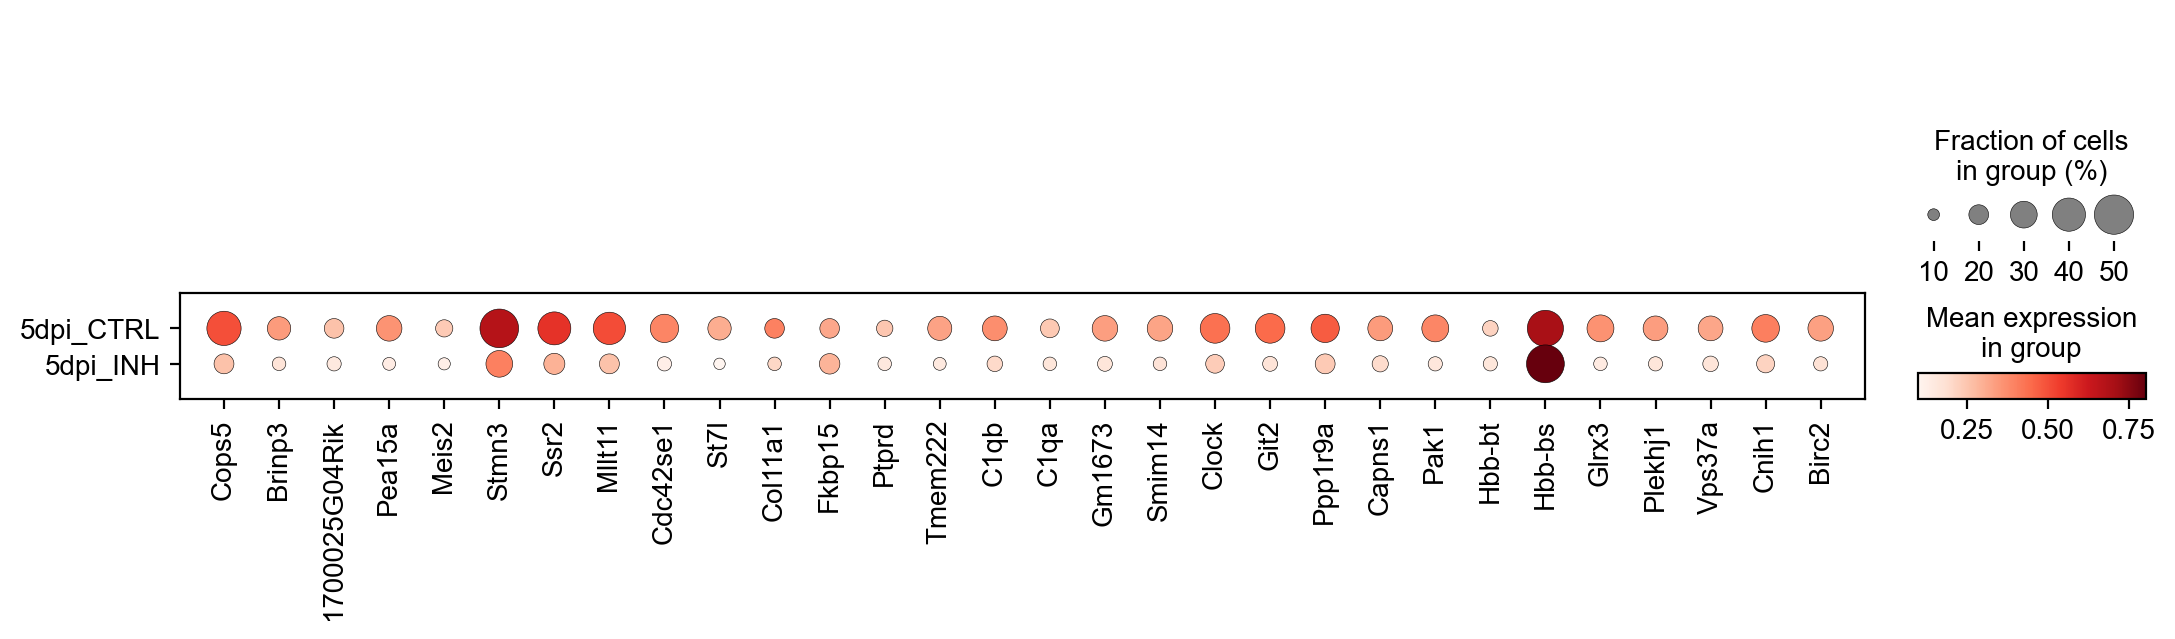

In [82]:
sc.pl.dotplot(adata_all_oligos_5dpi_COPs2,oligos_5dpi_CTRL_COPs2['gene'].head(30) , groupby='condition',)

# Cluster MOL1

In [83]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL1= de.test.wald(
    data=adata_all_oligos_5dpi_MOL1.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_MOL1.var_names,
    sample_description=adata_all_oligos_5dpi_MOL1.obs
)

training location model: False
training scale model: True
iter   0: ll=32393831.434059
iter   1: ll=32393831.434059, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=4036579.120376, converged: 0.64% (loc: 0.64%, scale update: True), in 12.99sec
iter   3: ll=4036579.120376, converged: 0.64% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=3889404.733940, converged: 92.86% (loc: 92.86%, scale update: True), in 12.47sec
iter   5: ll=3889404.733940, converged: 92.86% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=3870903.538638, converged: 98.46% (loc: 98.46%, scale update: True), in 5.98sec
iter   7: ll=3870903.538638, converged: 98.46% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=3867679.626616, converged: 99.69% (loc: 99.69%, scale update: True), in 5.80sec
iter   9: ll=3867679.626616, converged: 99.69% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=3867167.541070, converged: 99.95% (loc: 99.95%, scale 

/opt/anaconda3/envs/sc_tutorial_020321_scvi_040523/lib/python3.8/site-packages/dask/array/core.py:2894: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


Order test results by q-value:

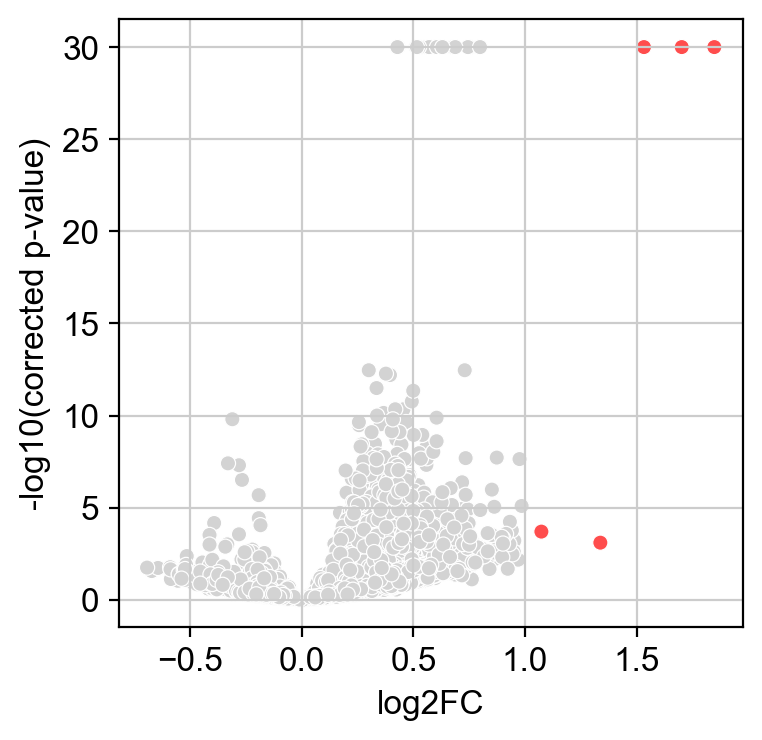

In [84]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL1.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [85]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL1.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL1.csv')

In [86]:
today

'230830'

In [87]:
difxpy_5dpi_INHvsCTRL_MOL1 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL1.csv', index_col=0)

In [88]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_MOL1=difxpy_5dpi_INHvsCTRL_MOL1.loc[difxpy_5dpi_INHvsCTRL_MOL1['mean']>0.2]

In [89]:
difxpy_5dpi_INHvsCTRL_expressed_MOL1

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,Mrpl15,5.472510e-01,7.095758e-01,0.071990,0.414348,False,5.280466e-01,0.071990,0.119607,-132.198733
1,Tcea1,1.422428e-03,1.007220e-02,0.295444,0.838946,False,5.252493e-09,0.295444,0.092614,-843.929272
2,Atp6v1h,6.512172e-01,7.840058e-01,-0.055448,0.459736,False,3.281185e-09,-0.055448,0.122652,-615.223602
3,Rb1cc1,9.672874e-03,4.219896e-02,0.279215,0.689605,False,3.410108e-09,0.279215,0.107917,-772.623088
4,St18,1.115080e-05,2.113173e-04,0.455378,0.879941,False,6.218293e-09,0.455378,0.103647,-876.183231
...,...,...,...,...,...,...,...,...,...,...
6551,mt-Nd5,1.709743e-14,4.484315e-12,0.499211,5.345534,False,1.913856e-09,0.499211,0.065079,-1834.082859
6552,mt-Nd6,4.252455e-08,2.005996e-06,0.734362,0.464129,False,3.665179e-09,0.734362,0.134007,-609.777700
6553,mt-Cytb,3.736900e-11,4.804481e-09,0.263158,52.985359,False,9.944859e-08,0.263158,0.039787,-3160.670271
6554,Vamp7,3.448745e-01,5.318302e-01,0.117600,0.404100,False,7.810993e-11,0.117600,0.124500,-567.348833


In [90]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_MOL1 = difxpy_5dpi_INHvsCTRL_expressed_MOL1.loc[difxpy_5dpi_INHvsCTRL_expressed_MOL1['pval']<0.05]

In [91]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_MOL1 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL1.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL1['log2fc']>0.7]
oligos_5dpi_CTRL_MOL1 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL1.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL1['log2fc']<-0.7]

In [92]:
oligos_5dpi_INH_MOL1.shape

(39, 10)

In [93]:
oligos_5dpi_CTRL_MOL1.shape

(0, 10)

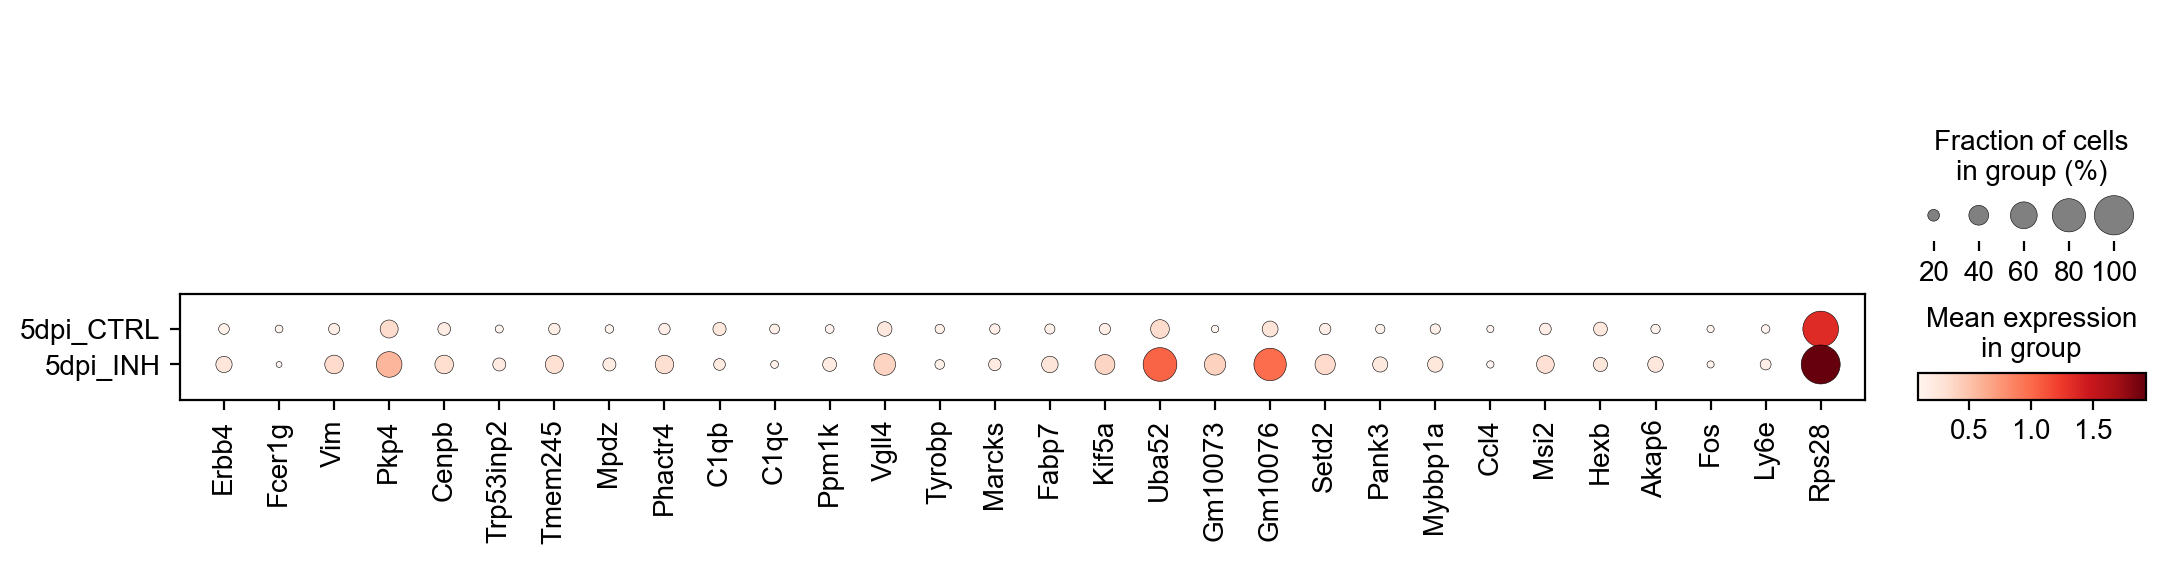

In [94]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL1,oligos_5dpi_INH_MOL1['gene'].head(30) , groupby='condition',)

In [95]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL1,oligos_5dpi_CTRL_MOL1['gene'].head(30) , groupby='condition',)

DataError: No numeric types to aggregate

# Cluster MOL2

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL2= de.test.wald(
    data=adata_all_oligos_5dpi_MOL2.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_MOL2.var_names,
    sample_description=adata_all_oligos_5dpi_MOL2.obs
)

Order test results by q-value:

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL2.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL2.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL2.csv')

In [ ]:
today

In [ ]:
difxpy_5dpi_INHvsCTRL_MOL2 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL2.csv', index_col=0)

In [ ]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_MOL2=difxpy_5dpi_INHvsCTRL_MOL2.loc[difxpy_5dpi_INHvsCTRL_MOL2['mean']>0.2]

In [ ]:
difxpy_5dpi_INHvsCTRL_expressed_MOL2

In [ ]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_MOL2 = difxpy_5dpi_INHvsCTRL_expressed_MOL2.loc[difxpy_5dpi_INHvsCTRL_expressed_MOL2['pval']<0.05]

In [ ]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_MOL2 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL2['log2fc']>0.7]
oligos_5dpi_CTRL_MOL2 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL2.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL2['log2fc']<-0.7]

In [ ]:
oligos_5dpi_INH_MOL2.shape

In [ ]:
oligos_5dpi_CTRL_MOL2.shape

In [ ]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL2,oligos_5dpi_INH_MOL2['gene'].head(30) , groupby='condition',)

In [ ]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL2,oligos_5dpi_CTRL_MOL2['gene'].head(30) , groupby='condition',)

# Cluster MOL3

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL3= de.test.wald(
    data=adata_all_oligos_5dpi_MOL3.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_MOL3.var_names,
    sample_description=adata_all_oligos_5dpi_MOL3.obs
)

Order test results by q-value:

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL3.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL3.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL3.csv')

In [ ]:
today

In [ ]:
difxpy_5dpi_INHvsCTRL_MOL3 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL3.csv', index_col=0)

In [ ]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_MOL3=difxpy_5dpi_INHvsCTRL_MOL3.loc[difxpy_5dpi_INHvsCTRL_MOL3['mean']>0.2]

In [ ]:
difxpy_5dpi_INHvsCTRL_expressed_MOL3

In [ ]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_MOL3 = difxpy_5dpi_INHvsCTRL_expressed_MOL3.loc[difxpy_5dpi_INHvsCTRL_expressed_MOL3['pval']<0.05]

In [ ]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_MOL3 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL3.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL3['log2fc']>0.7]
oligos_5dpi_CTRL_MOL3 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL3.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL3['log2fc']<-0.7]

In [ ]:
oligos_5dpi_INH_MOL3.shape

In [ ]:
oligos_5dpi_CTRL_MOL3.shape

In [ ]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL3,oligos_5dpi_INH_MOL3['gene'].head(30) , groupby='condition',)

In [ ]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL3,oligos_5dpi_CTRL_MOL3['gene'].head(30) , groupby='condition',)

# Cluster MOL4

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL4= de.test.wald(
    data=adata_all_oligos_5dpi_MOL4.layers['counts'].toarray(), #need the counts for the test
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition",
    gene_names=adata_all_oligos_5dpi_MOL4.var_names,
    sample_description=adata_all_oligos_5dpi_MOL4.obs
)

Order test results by q-value:

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL4.plot_volcano(corrected_pval=True, min_fc=2.0, alpha=0.05, size=30)

Save results to file.

In [ ]:
difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL4.summary().to_csv(table_dir+today + 'difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL4.csv')

In [ ]:
today

In [ ]:
difxpy_5dpi_INHvsCTRL_MOL4 = pd.read_csv(table_dir + '230830difxpy_reactiveoligos_5dpi_INHvsCTRL_MOL4.csv', index_col=0)

In [ ]:
#Visualise your top 10 DE genes in a heatmap/matrixplot/dotplot.
difxpy_5dpi_INHvsCTRL_expressed_MOL4=difxpy_5dpi_INHvsCTRL_MOL4.loc[difxpy_5dpi_INHvsCTRL_MOL4['mean']>0.2]

In [ ]:
difxpy_5dpi_INHvsCTRL_expressed_MOL4

In [ ]:
#Extract the significant differentially expressed genes from the test.summary() table and split the list into higher expressed in cortex and higher expressed in substantia nigra.
difxpy_5dpi_INHvsCTRL_expressed_signif_MOL4 = difxpy_5dpi_INHvsCTRL_expressed_MOL4.loc[difxpy_5dpi_INHvsCTRL_expressed_MOL4['pval']<0.05]

In [ ]:
#Filter for a minimum mean expression of 0.05 (or choose your own threshold).
oligos_5dpi_INH_MOL4 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL4.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL4['log2fc']>0.7]
oligos_5dpi_CTRL_MOL4 = difxpy_5dpi_INHvsCTRL_expressed_signif_MOL4.loc[difxpy_5dpi_INHvsCTRL_expressed_signif_MOL4['log2fc']<-0.7]

In [ ]:
oligos_5dpi_INH_MOL4.shape

In [ ]:
oligos_5dpi_CTRL_MOL4.shape

In [ ]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL4,oligos_5dpi_INH_MOL4['gene'].head(30) , groupby='condition',)

In [ ]:
sc.pl.dotplot(adata_all_oligos_5dpi_MOL4,oligos_5dpi_CTRL_MOL4['gene'].head(30) , groupby='condition',)